<a href="https://colab.research.google.com/github/Sivani2004/Liver-Cancer-Detection-using-histopathology-Images/blob/main/Liver_Cancer_Detection_from_Histopathololgy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, jaccard_score, classification_report, confusion_matrix


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score, jaccard_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Set the paths to your training, validation, and testing data
train_data_dir = '/content/gdrive/MyDrive/Training'
validation_data_dir = '/content/gdrive/MyDrive/Validation'
test_data_dir = '/content/gdrive/MyDrive/Test'


In [ ]:
# Set the dimensions of your input images
img_width, img_height = 150, 150


In [ ]:


# Set the number of training and validation samples, batch size, and number of epochs
train_samples = 1000
validation_samples = 200
batch_size = 20
epochs = 10


In [ ]:
# Data augmentation for training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Rescale pixel values to [0, 1]
    shear_range=0.2,         # Apply shear transformation
    zoom_range=0.2,          # Apply zoom transformation
    horizontal_flip=True)    # Flip images horizontally


In [ ]:
# Rescaling for validation and testing images
validation_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)


In [ ]:
# Generate batches of augmented training data/Loading the training data
train_generator = train_datagen.flow_from_directory(
                            train_data_dir, target_size=(img_width, img_height),
                            batch_size=batch_size, class_mode='categorical')


Found 2549 images belonging to 4 classes.


In [ ]:
# Generate batches of validation data/Loading the validation data
validation_generator = validation_datagen.flow_from_directory(validation_data_dir, target_size=(img_width, img_height),
                                                              batch_size=batch_size, class_mode='categorical')


Found 280 images belonging to 4 classes.


In [ ]:
# Generate batches of testing data/Loading the test data
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(img_width, img_height),
                                                  batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 280 images belonging to 4 classes.


In [ ]:
# create the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])


In [ ]:
# Calculate the number of steps per epoch and validation steps
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

# Train the model
history = model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs,
                    validation_data=validation_generator, validation_steps=validation_steps,
                    verbose=1)


Epoch 1/10
127/127 [==============================] - 388s 3s/step - loss: 1.2195 - accuracy: 0.4211 - val_loss: 0.9990 - val_accuracy: 0.5750
Epoch 2/10
127/127 [==============================] - 111s 873ms/step - loss: 0.8045 - accuracy: 0.6129 - val_loss: 0.8222 - val_accuracy: 0.6000
Epoch 3/10
127/127 [==============================] - 100s 784ms/step - loss: 0.5877 - accuracy: 0.7189 - val_loss: 0.7136 - val_accuracy: 0.6393
Epoch 4/10
127/127 [==============================] - 100s 784ms/step - loss: 0.5044 - accuracy: 0.7635 - val_loss: 0.5686 - val_accuracy: 0.7750
Epoch 5/10
127/127 [==============================] - 97s 763ms/step - loss: 0.4363 - accuracy: 0.8086 - val_loss: 0.6048 - val_accuracy: 0.7393
Epoch 6/10
127/127 [==============================] - 96s 756ms/step - loss: 0.4666 - accuracy: 0.8047 - val_loss: 0.6862 - val_accuracy: 0.7571
Epoch 7/10
127/127 [==============================] - 98s 775ms/step - loss: 0.3823 - accuracy: 0.8221 - val_loss: 0.6433 - val_a

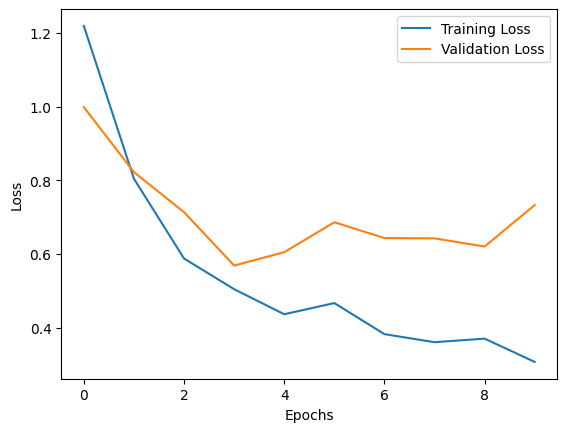

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

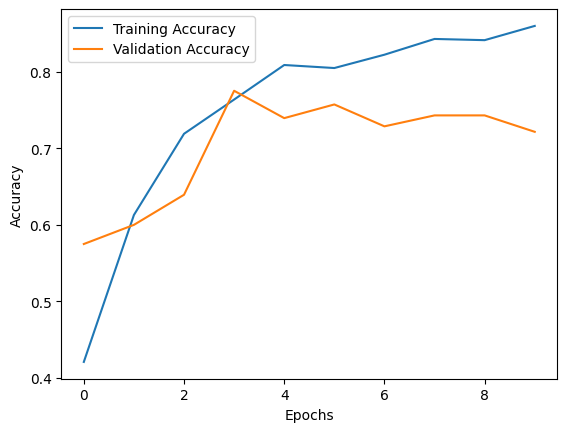

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model
y_true = test_generator.classes
y_pred_probabilities = model.predict(test_generator)
y_pred = np.argmax(y_pred_probabilities, axis=1)


14/14 [==============================] - 3s 212ms/step


In [ ]:

# Evaluate the model
y_true = test_generator.classes
y_pred_probabilities = model.predict(test_generator)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute class-wise accuracy
class_accuracy = accuracy_score(y_true, y_pred)
class_wise_accuracy = accuracy_score(y_true, y_pred, normalize=False)

# Compute F1 score, Jaccard score, and classification report
f1 = f1_score(y_true, y_pred, average='weighted')
jaccard = jaccard_score(y_true, y_pred, average='weighted')
classification = classification_report(y_true, y_pred)

# Compute confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Print the computed metrics
print("Class-wise Accuracy:", class_wise_accuracy)
print("F1 Score:", f1)
print("Jaccard Score:", jaccard)
print("Classification Report:\n", classification)
print("Confusion Matrix:\n", confusion)

14/14 [==============================] - 3s 216ms/step
Class-wise Accuracy: 208
F1 Score: 0.7471567551751884
Jaccard Score: 0.6084815608120693
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        70
           1       0.60      0.71      0.65        80
           2       0.68      0.64      0.66        80
           3       1.00      0.80      0.89        50

    accuracy                           0.74       280
   macro avg       0.78      0.75      0.76       280
weighted avg       0.76      0.74      0.75       280

Confusion Matrix:
 [[60  0 10  0]
 [10 57 13  0]
 [ 0 29 51  0]
 [ 0  9  1 40]]


In [ ]:
# Compute evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
confusion = confusion_matrix(y_true, y_pred)
classification = classification_report(y_true, y_pred)
jaccard = jaccard_score(y_true, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification)
print("Jaccard Score:", jaccard)

Accuracy: 0.7428571428571429
Precision: 0.7585714285714286
Confusion Matrix:
 [[60  0 10  0]
 [10 57 13  0]
 [ 0 29 51  0]
 [ 0  9  1 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        70
           1       0.60      0.71      0.65        80
           2       0.68      0.64      0.66        80
           3       1.00      0.80      0.89        50

    accuracy                           0.74       280
   macro avg       0.78      0.75      0.76       280
weighted avg       0.76      0.74      0.75       280

Jaccard Score: 0.6084815608120693


In [ ]:
!jupyter nbconvert --to html /content/Liver_Cancer_Detection_from_Histopathololgy.ipynb

[NbConvertApp] Converting notebook /content/Liver_Cancer_Detection_from_Histopathololgy.ipynb to html
[NbConvertApp] Writing 683707 bytes to /content/Liver_Cancer_Detection_from_Histopathololgy.html
